## Final Project Submission

Please fill out:
* Student name: **Dennis Trimarchi**
* Student pace: **full time**
* Scheduled project review date/time: **Not yet scheduled**
* Instructor name: **Rafael Cassaro**
* Blog post URL: **Not yet created**


This file:
**Student_2_Questions.jpynb**


# EDA and Questions

I did some EDA in my data scrubbing notebook. -update of yr_renovated field and creation of zip_981 field.

When I initially looked at the data during the Data Scrubbing phase, I thought about the following questions:

1. *Are waterfront properties significantly more expensive than non-waterfront?*
2. *Are newer homes more expensive (yr_built)?*
3. *Is there a particular location or locations where I can categorize homes as more expensive?*

### Import a bunch of libraries

There are a bunch of libraries that are used in this project. They are imported and aliased below.

In [85]:
#Datarames and Computation
import numpy as np
import pandas as pd

#Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')
#contexts available: poster, paper, talk, notebook
sns.set_context('paper')

#STATSMODELS

#statistical analysis & regression
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

#PICKLE for saving objects
import pickle

#### Read in DataFrame from pickle file

In [86]:
with open('data.pickle','rb') as f:
    data = pickle.load(f)
    
data.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,zip_981,has_basement
count,2.096300e+04,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000,20963.000000
mean,5.154048e+05,3.355102,2.108858,2032.599389,10750.234270,1.488360,0.004675,3.411153,7.614607,1749.281925,1970.785384,1972.678338,98078.731384,47.560797,-122.217000,1962.964080,9979.023184,0.423365,0.383247
std,2.830298e+05,0.879990,0.728166,834.998842,13638.141655,0.539631,0.068215,0.649884,1.119503,769.590305,29.371643,28.971475,53.656112,0.138196,0.138392,662.339591,11795.111734,0.494104,0.486189
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.512000,460.000000,651.000000,0.000000,0.000000
25%,3.200000e+05,3.000000,1.500000,1410.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1180.000000,1951.000000,1954.000000,98033.000000,47.472750,-122.330000,1480.000000,5054.000000,0.000000,0.000000
50%,4.470000e+05,3.000000,2.000000,1890.000000,7500.000000,1.500000,0.000000,3.000000,7.000000,1540.000000,1974.000000,1977.000000,98070.000000,47.571900,-122.235000,1820.000000,7536.000000,0.000000,0.000000
75%,6.300000e+05,4.000000,2.500000,2500.000000,10275.000000,2.000000,0.000000,4.000000,8.000000,2160.000000,1996.000000,1998.000000,98118.000000,47.678850,-122.129000,2330.000000,9870.000000,1.000000,1.000000
max,1.990000e+06,7.000000,5.000000,5990.000000,149410.000000,3.500000,1.000000,5.000000,13.000000,5990.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,5790.000000,149410.000000,1.000000,1.000000


Pickle is amazing I must say.

In [87]:
#Correlations with price
correlations = data.corr()
correlations['price'].sort_values(ascending=False)

price            1.000000
grade            0.674132
sqft_living      0.671363
sqft_living15    0.598063
sqft_above       0.572003
bathrooms        0.488452
lat              0.373699
bedrooms         0.321556
floors           0.274029
has_basement     0.178310
waterfront       0.145956
sqft_lot         0.120031
sqft_lot15       0.111745
yr_renovated     0.094559
yr_built         0.053003
condition        0.041814
long             0.027491
zip_981          0.002487
zipcode         -0.040772
Name: price, dtype: float64

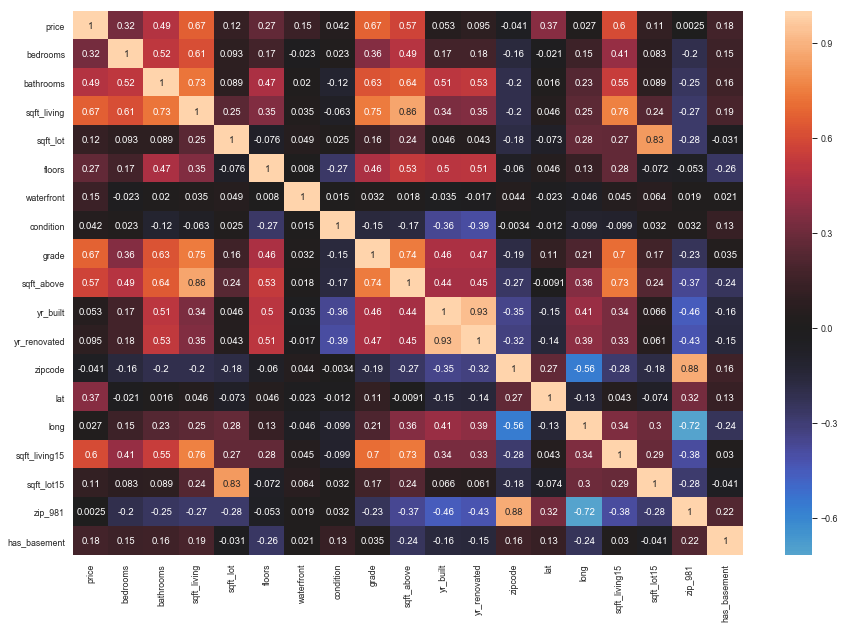

In [88]:
#Heatmap of all correlation coefficients
plt.figure(figsize=(15,10))
sns.heatmap(correlations, center=0, annot=True)

### Initial Analysis of Heatmap

- All of that work updating yr_renovated to be more representative and it's still poorly correlated to price.
- Zip_981 is also poorly correlated. 
- There is some nasty collinearity going on between several of my features: 
  - sqft_living
  - sqft_living15
  - sqft_above
  - bedrooms
  - bathrooms
  - grade
- Will want to drop all features with < .10 correlation
- I would like to utilize lat and long in some way to create a new variable. Make a distance from X point variable.

## Question 1 - Waterfront Property

Are waterfront properties significantly more expensive than non-waterfront? The heatmap does not look very promising here. Very weak positive correlation with price - **0.15 correlation coefficient**

Unfortunately, when I thought of this question, I did not realize that the DataFrame would contain so few records (only 98) for waterfront property. I will do some analysis here for the sake of the question anyway.

In [89]:
#See how many records are waterfront - only 98. ugh... my dataset is limited.
data['waterfront'].value_counts()

0    20865
1       98
Name: waterfront, dtype: int64

Median
waterfront
0     445000.0
1    1150000.0
Name: price, dtype: float64


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


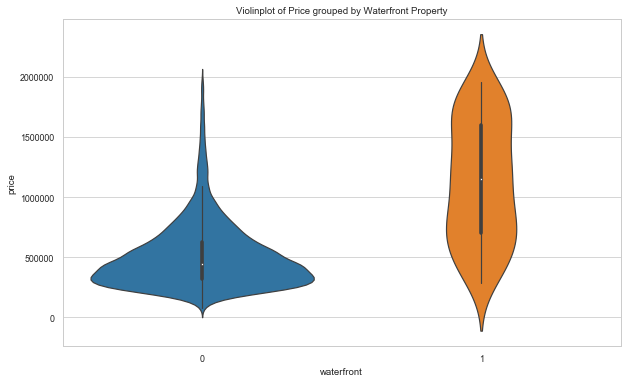

In [90]:
#Make a violin plot to see the distribution for waterfront and not waterfront.

plt.figure(figsize=(10,6))
sns.violinplot(x='waterfront',y='price',data=data)
plt.title("Violinplot of Price grouped by Waterfront Property")

#Also print the median for each just to see what it is.
print("Median")
print(data.groupby('waterfront')['price'].median())

It's a cool looking plot. Waterfront property does appear to skew higher in price.

Will run a quick ols regression to see what the regression results are:

In [91]:
#OLS Regression
f = 'price~waterfront'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     456.3
Date:                Sat, 01 Jun 2019   Prob (F-statistic):          3.67e-100
Time:                        18:00:42   Log-Likelihood:            -2.9267e+05
No. Observations:               20963   AIC:                         5.854e+05
Df Residuals:                   20961   BIC:                         5.854e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.126e+05   1938.463    264.423      0.000    5.09e+05    5.16e+05
waterfront  6.056e+05   2.84e+04     21.360      0.000     5.5e+05    6.61e+05
==============================================================================
Omnibus:                     7020.274   Durbin-Watson:                   1.956
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            24274.495
Skew:                           1.694   Prob(JB):                         0.00
Kurtosis:                       7.039   Cond. No.                         14.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 1 - Discussion / Answer

Waterfront view and price are positively correlated. 

The low p-value (0 in this case) indicates that the coefficient is statistically significant.

The coefficient would indicate that having a view of the waterfront results in an increase of $600K for the price. I think this is ridiculous, but the data does seem to support that waterfront is positively correlated for sure. For example: 
- Homes with waterfront: median price = 1,150,000
- Homes without waterfront: median price = 445,000

So the regression coefficient isn't that surprising considering the median values of our dataset.

The R-squared is pretty awful (0.021). I suppose this makes perfect sense since home prices are based on many other factors than just whether the property is waterfront.

## Question 2 - Newer Homes

2. Are newer homes more expensive?

yr_built ranges from 1900 to 2015 with a median year of 1974. This is not normally distributed (as it shouldn't be) since homes are typically built consistently from year to year (not accounting for market / real estate trends).

For this, I will have to look at the yr_built field. I originally thought that it was possible that newer homes would be more expensive. But the heatmap makes this look like that's a big fat NO. The **correlation coefficient with price is 0.053** which indicates a very very weak correlation with price.

So, it looks to be that newer homes are not more expensive, or at the very least they are very weakly positively correlated with price.

In [92]:
#See some basic stats for the yr_built feature.
data['yr_built'].describe()

count    20963.000000
mean      1970.785384
std         29.371643
min       1900.000000
25%       1951.000000
50%       1974.000000
75%       1996.000000
max       2015.000000
Name: yr_built, dtype: float64

Year built is hardly correlated with price at all. Looks to be that newer homes are not more expensive... or at the very least they are very weakly positively correlated with price.

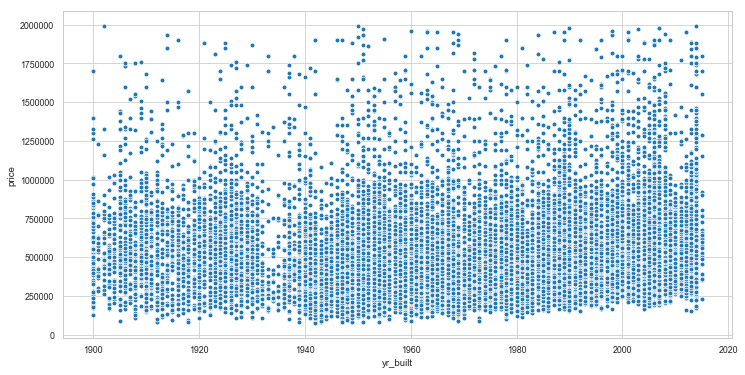

In [93]:
#Basic scatterplot between yr_built and price.
plt.figure(figsize=(12,6))
sns.scatterplot(x=data['yr_built'], y=data['price'])
plt.show()

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


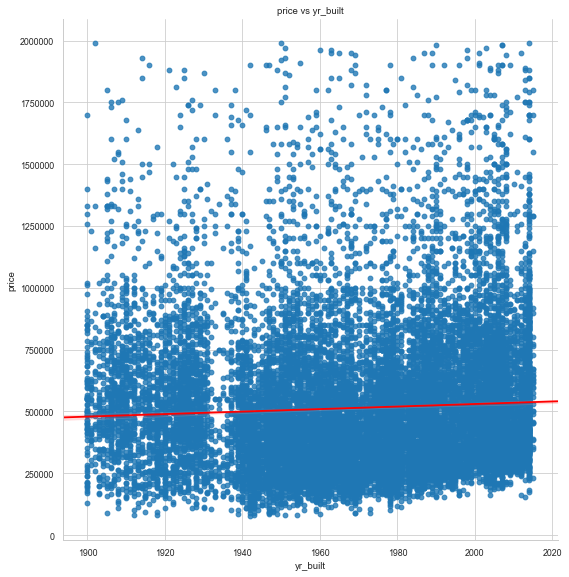

In [94]:
#Seaborn lmplot which shows best fit line:  price vs. yr_built
sns.lmplot('yr_built','price',data, line_kws={'color': 'red'}, size=8)
plt.title("price vs yr_built")
plt.show()

It doesn't really look like there is a strong relationship, a super-weak positive relationship. This goes along with the low correlation coefficient. 

However, it looks like there is a positive relationship more recently. I don't want to drop a majority of the records though. Let's create a variable built_last_20_yrs which means home built in the last 20 years (after 1995).

In [95]:
#make new feature - built in last 20 years - dataset has 2015 as newest year.
data['built_last_20_yrs'] = (data['yr_built']>1995).astype(int)

Median
built_last_20_yrs
0    430000.0
1    497475.0
Name: price, dtype: float64


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


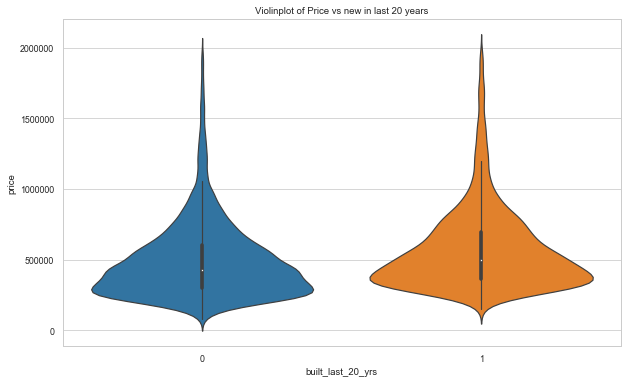

In [96]:
#Make a violin plot to see the distribution for waterfront and not waterfront.

plt.figure(figsize=(10,6))
sns.violinplot(x='built_last_20_yrs',y='price',data=data)
plt.title("Violinplot of Price vs new in last 20 years")

#Also print the median for each just to see what it is.
print("Median")
print(data.groupby('built_last_20_yrs')['price'].median())

Hmmm. It looks like this could be something significant but not much.

In [97]:
#Correlations with price
correlations = data.corr()
correlations['price']['built_last_20_yrs']

0.1283410445536684

The correlation with price is greater than the original feature. This is good. Let's keep it around for the model later.

Let's run a quick OLS regression to see what pops out.

In [99]:
#OLS Regression
f = 'price~built_last_20_yrs'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.016
Method:                 Least Squares   F-statistic:                     351.0
Date:                Sat, 01 Jun 2019   Prob (F-statistic):           1.09e-77
Time:                        18:01:31   Log-Likelihood:            -2.9273e+05
No. Observations:               20963   AIC:                         5.855e+05
Df Residuals:                   20961   BIC:                         5.855e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           4.94e+05   2249.891    219.572      0.000     4.9e+05    4.98e+05
built_last_20_yrs  8.307e+04   4433.756     18.736      0.000    7.44e+04    9.18e+04
==============================================================================
Omnibus:                     7327.680   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            26276.388
Skew:                           1.760   Prob(JB):                         0.00
Kurtosis:                       7.207   Cond. No.                         2.47
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 2 - Discussion / Answer

The p-value is zero... that's good. This means that the feature is statistically significant. The **coefficient of 83,000** would indicate that a home built in the last 20 years has a price 83,000 more than a home that was not built in the last 20 years. 

## Question 3 - Where are the expensive homes?


3. Is there a particular location or locations where I can categorize homes as more expensive?

### Use Lat and Long to make a new feature.

Below I have created a scatterplot of longitude vs. latitude with the hue representing price. This creates a nifty looking map of the area. It looks like areas immediately east of downtown Seattle - on the other side of lake washington are more expensive. Also areas to the north seem to look more expensive.

Text(0.5, 1.0, 'Price by Geographical Location')

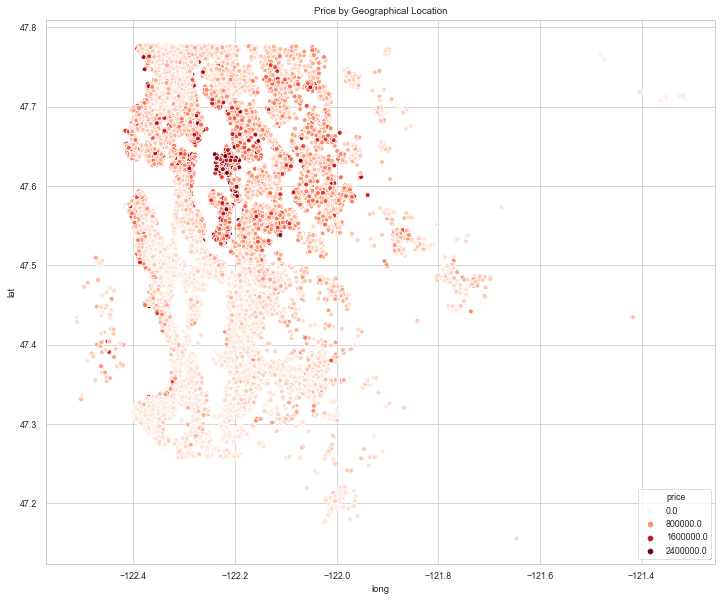

In [100]:
#Plotting Lat vs Long to get a map of homes. The color of the dots represent price.
plt.figure(figsize=(12,10))
sns.scatterplot(data['long'], data['lat'], hue=data['price'], palette='Reds')
plt.legend(loc='lower right')
plt.title("Price by Geographical Location")

This figure is so cool!

I want to find the point on the map where distance from it is most correlated with price.

#### Iterate through lat/long points to find a place where distance from it is highly correlated with price.

I ran the below code which includes a function and then some nested for loops to see if there exists a location that has a strong correlation with price. It returned a location just northeast of Bellvue, WA. I will create a new column called "dist_from_Bellvue" which will contain the distance in miles from Bellvue, WA.

In [101]:
#Function to calculate the distance between to geographical points in latitude and longitude.

import math
def distance_between(lat1, long1, lat2, long2):
    """
    Calculates the distance between two points.

    Parameters:
    lat1 = latitude of place #1
    long1 = longitude of place #1
    lat2 = latitude of place #2
    long2 = longitude of place #2

    Returns:
    distance in miles
    """
    
    radius = 3958.756  # miles

    dlat = math.radians(lat2 - lat1)
    dlong = math.radians(long2 - long1)
    a = (math.sin(dlat / 2) * math.sin(dlat / 2) +
         math.cos(math.radians(lat1)) * math.cos(math.radians(lat2)) *
         math.sin(dlong / 2) * math.sin(dlong / 2))
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    d = radius * c
    
    return d

In [70]:
#WARNING - THIS TAKES A LONG TIME TO EXECUTE
#Check a range of points on the map to find a point where correlation with price is highest

#Get min and max values for lat and long columns
min_lat = data['lat'].min()
max_lat = data['lat'].max()
min_long = data['long'].min()
max_long = data['long'].max()

#Set variables for maximum correlation and best point which will contain the correlation
#with price and the location where the best correlation can be found.
max_corr = 0       #maximum correlation with price discovered
best_point = (0,0) #place where maximum correlation can be found

#iterate through latitudes and longitudes to provide a point to reference against
#latitudes for loop
for lat_pt in np.linspace(min_lat, max_lat, 50):
    #longitudes for loop
    for long_pt in np.linspace(min_long, max_long, 50):
        #make a list to contain the distances to the point from dataset locations
        dist = []
        #iterate through DataFrame locations
        for lat_data, long_data in zip(data.lat, data.long):
            #create list of distances
            dist.append(distance_between(lat_data,long_data,lat_pt,long_pt))
        
        #once the list is populated, check correlation with price
        dist_correlation = np.corrcoef(data['price'], dist)[1][0]
        dist = []
        #check if new correlation is larger and update if so. 
        #Using absolute value because negative correlations are good too!
        if abs(dist_correlation) > max_corr:
            max_corr = abs(dist_correlation)
            best_point = (lat_pt,long_pt)
            

best_point
#Ran with 50 latitudes and 50 longitudes (50x50) points, which took a long time:
#Returned 47.63803469387755, -122.17, with correlation of 0.48734

(47.63803469387755, -122.17)

In [102]:
max_corr

0.48733545470382955

**This is Bellvue, WA area** 

And this reult makes sense from the geography plot above. Bellvue is in the area where the dark high price dots are located. I'm going to create the new feature called **dist_from_bellvue**

In [103]:
#Make new feature dist_from_Bellvue which will use the lat/long values of "best_point" calculated above.
dist = []
for lat, long in zip(data.lat, data.long):
    dist.append(distance_between(lat,long, 47.63803469387755,-122.17))
    
data['dist_from_Bellvue'] = dist

In [104]:
#Correlation with price - verify that it matches what was calculated in the algorithm earlier.
correlations = data.corr()
correlations['price']['dist_from_Bellvue']

-0.48733545470382983

**Check for Normality of newly created feature**

Ran dist and scatter plots - it was skewed looking. Decided to take the log. Histogram looks nicer and it is more highly correlated with price. It's not perfect, but it's a little better.

dist_from_Bellvue


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


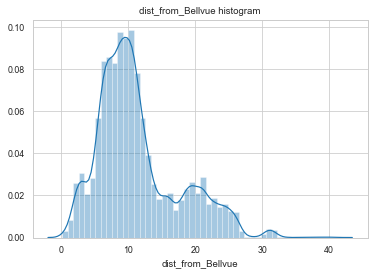

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


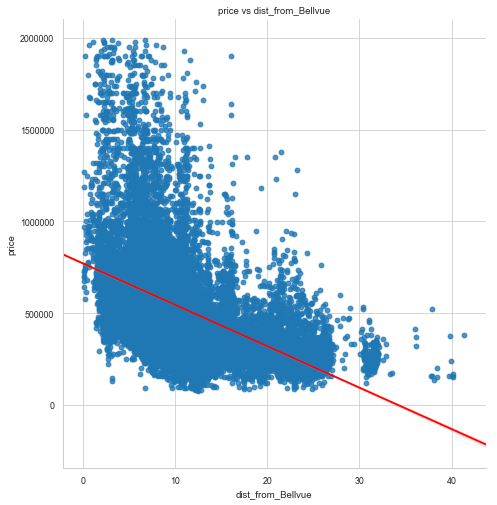

In [105]:
#dist from Bellvue plot
feature_plots('dist_from_Bellvue', 'price', data)

In [106]:
#Create log of dist from Bellvue feature. 
data['log_dist_from_Bellvue'] = data['dist_from_Bellvue'].apply(lambda x: np.log(x))

log_dist_from_Bellvue


/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


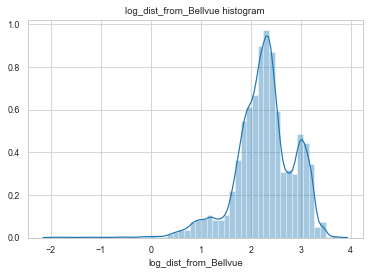

/Users/dennistrimarchi/anaconda3/envs/learn-env/lib/python3.6/site-packages/seaborn/regression.py:546: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


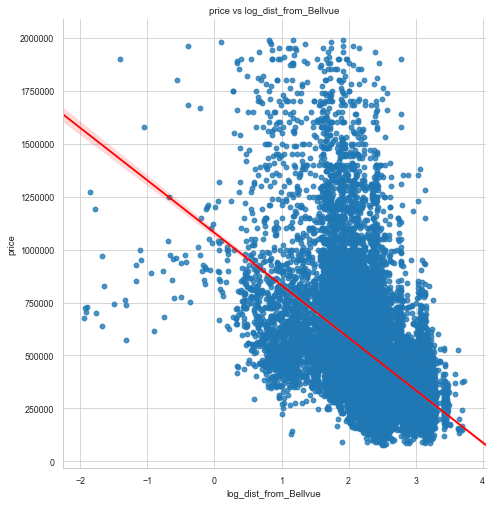

In [107]:
#log dist from Bellvue plots
feature_plots('log_dist_from_Bellvue', 'price', data)

#### Run a quick OLS Regression against dist_from_Bellvue

In [108]:
#OLS Regression
f = 'price~dist_from_Bellvue'
model = ols(formula=f, data=data).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.237
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     6529.
Date:                Sat, 01 Jun 2019   Prob (F-statistic):               0.00
Time:                        18:02:27   Log-Likelihood:            -2.9006e+05
No. Observations:               20963   AIC:                         5.801e+05
Df Residuals:                   20961   BIC:                         5.801e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          7.717e+05   3602.179    214.233      0.000    7.65e+05    7.79e+05
dist_from_Bellvue -2.259e+04    279.577    -80.800      0.000   -2.31e+04    -2.2e+04
==============================================================================
Omnibus:                     7552.876   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30679.288
Skew:                           1.763   Prob(JB):                         0.00
Kurtosis:                       7.763   Cond. No.                         27.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Question 3 - Discussion / Answer

There is a point just northeast of Bellvue, WA that is correlated with higher prices. The map of the area shows many expensive homes near there. The correlation **coefficient of -0.48** indicates a negative correlation with price, which makes sense because as distance from Bellvue increased, price decreases.

The low p-value (0 in this case) indicates that the coefficient is statistically significant.

The coefficient would indicate that for every mile away from Bellvue a home is located, it's price goes down by $20,000. I think this is definitely possible.


# Back to General EDA
## Check Heatmap Again

price                    1.000000
grade                    0.674132
sqft_living              0.671363
sqft_living15            0.598063
sqft_above               0.572003
log_dist_from_Bellvue    0.513302
bathrooms                0.488452
dist_from_Bellvue        0.487335
lat                      0.373699
bedrooms                 0.321556
floors                   0.274029
has_basement             0.178310
waterfront               0.145956
built_last_20_yrs        0.128341
sqft_lot                 0.120031
sqft_lot15               0.111745
yr_renovated             0.094559
yr_built                 0.053003
condition                0.041814
zipcode                  0.040772
long                     0.027491
zip_981                  0.002487
Name: price, dtype: float64


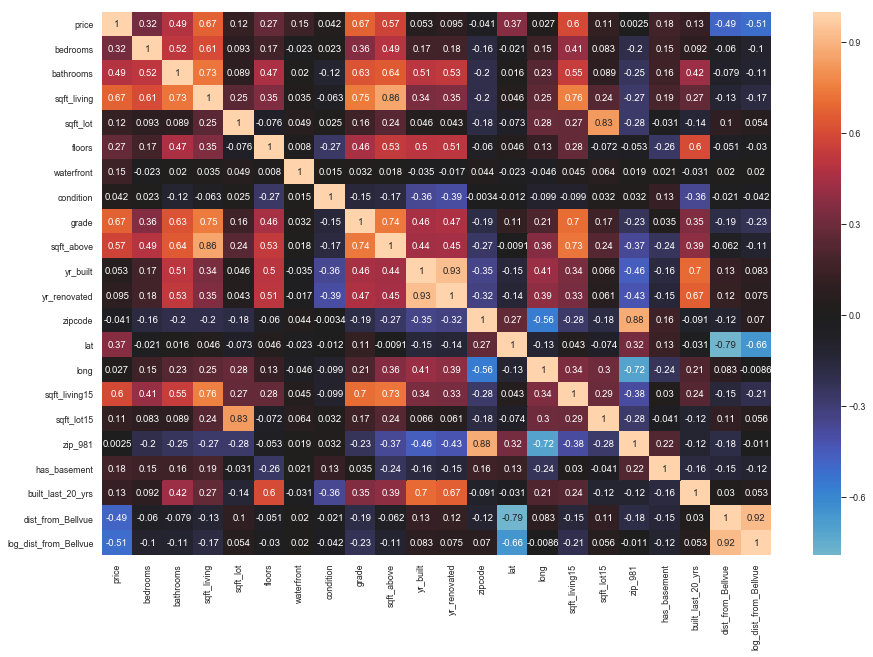

In [109]:
correlations = data.corr()
print(abs(correlations['price']).sort_values(ascending=False))
plt.figure(figsize=(15,10))
sns.heatmap(correlations, center=0, annot=True)

Dropping every feature where correlation with Price **<= 0.10**.

In [110]:
#Dropping columns where correlation with price is <=0.10
data = data.drop(['condition', 'yr_built', 'yr_renovated', 'zipcode', 'long', 'zip_981'], axis=1)

## Pickle the DataFrame

* data DataFrame to be used in student_3_Model Notebook!

In [111]:
#Write data to file
with open('data.pickle','wb') as f:
    pickle.dump(data,f,pickle.HIGHEST_PROTOCOL)

In [112]:
#Verify that pickle worked
with open('data.pickle','rb') as f_read:
    data_from_pickle = pickle.load(f_read)

In [113]:
print(data_from_pickle.shape)
data_from_pickle.head()

(20963, 16)


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,grade,sqft_above,lat,sqft_living15,sqft_lot15,has_basement,built_last_20_yrs,dist_from_Bellvue,log_dist_from_Bellvue
0,221900.0,3,1.0,1180,5650,1.0,0,7,1180,47.5112,1340,5650,0,0,9.656240,2.267604
1,538000.0,3,2.0,2570,7242,2.0,0,7,2170,47.7210,1690,7639,1,0,8.994609,2.196625
2,180000.0,2,1.0,770,10000,1.0,0,6,770,47.7379,2720,8062,0,0,7.496435,2.014428
3,604000.0,4,3.0,1960,5000,1.0,0,7,1050,47.5208,1360,5000,1,0,13.177219,2.578489
4,510000.0,3,2.0,1680,8080,1.0,0,8,1680,47.6168,1800,7503,0,0,6.002734,1.792215


### Function `feature_plots`

Was used in my Data Scrubbing notebook. Copied here for use in this notebook.

In [75]:
#define a function that will provide a couple plots for a feature - histogram and scatter
def feature_plots(feature,target,df):
    """
    Creates a histogram of the desired feature and a scatter plot of the target vs. the feature.
    feature = feature (column) name.
    target = target (column) name.
    df = dataframe containing both the feature and target
    returns nothing
    """
    #Print feature name to screen
    print(feature)
    
    #Histogram using sns distplot
    plt.title("{} histogram".format(feature))
    sns.distplot(df[feature])
    plt.show()
    
    #Scatter Plot using sns lmplot
    #plt.figure(figsize=(10,6))
    sns.lmplot(x=feature, y=target, data=df, line_kws={'color': 'red'}, size=7)
    plt.title("{} vs {}".format(target, feature))
    plt.show()
    
    pass